# Performing EDA on Haberman Cancer survival dataset

# Objective:

To perform Exploratory Data Analysis, such as Univariate Analysis(PDF,CDF, Boxplot, Violin Plot) and Bivariate analysis(Scatter plots, Pair plots) on the Haberman Dataset in order to understand which features or combination of features are useful in classification of patients into two survival statuses.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import the haberman dataset
haberman=pd.read_csv("haberman.csv")

#to find number of data-points and features in the dataset
print(haberman.shape)

#to find column names in the dataset
print(haberman.columns)

#to find number of data points per class
haberman['status'].value_counts()

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


1    225
2     81
Name: status, dtype: int64

# Bi-variate analysis

# Scatter plots

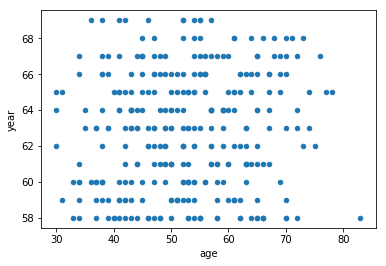

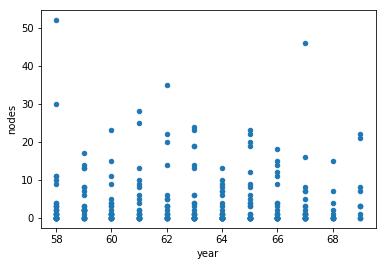

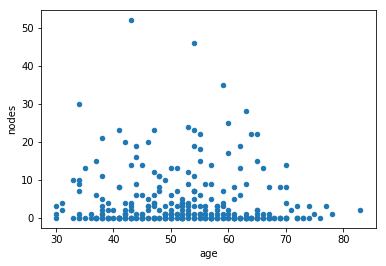

In [2]:
#print 2D scatter plots
haberman.plot(kind='scatter',x='age',y='year');
plt.show()

haberman.plot(kind='scatter',x='year',y='nodes');
plt.show()

haberman.plot(kind='scatter',x='age',y='nodes');
plt.show()


# Observations:
1. We need to be able to visualize this data based on the two survival statuses in order to be able to properly understand anything from the above scatter plots. This is why we will use color coded scatter plots to classify the data by survival status.

# Color coded Scatter plots

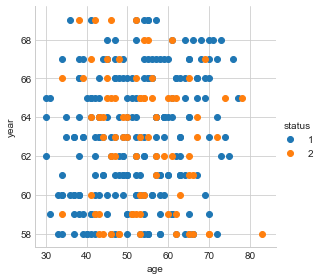

In [3]:
#now we shall used color coded 2D scatter plots to classify by status
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

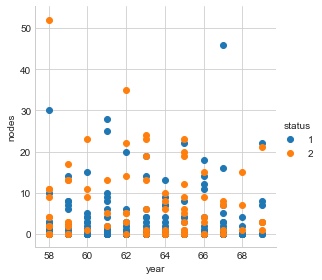

In [4]:
#it is not that easy to tell the two apart by using any if condition
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

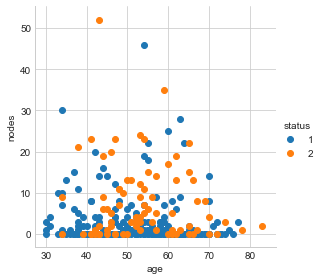

In [5]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

# Observations:

1. Looking at the three scatter plots above, we can observe that it is very difficult to separate status 1 patients from status    2 patients by using any of the three features: age, year and nodes.

# Pair plot

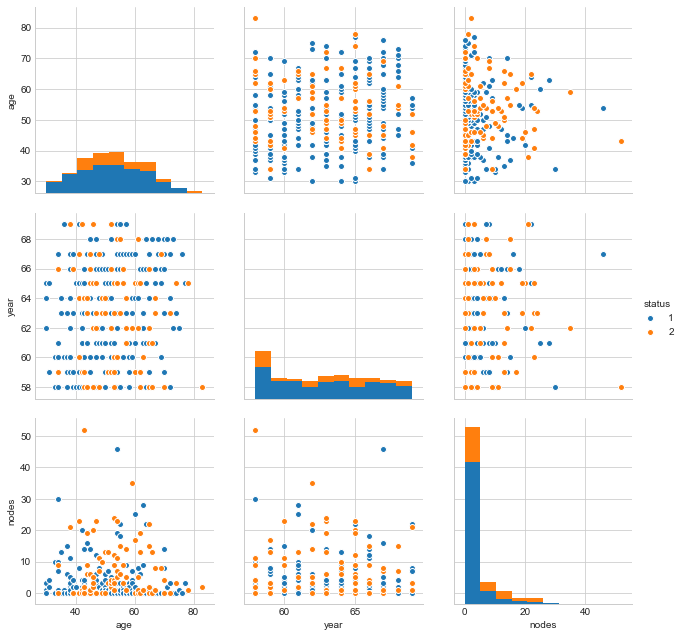

In [7]:
#as we can see, the 2D scatterplot does not help to classify the two statuses in any way
# we shall try using pair plots next
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3,vars=['age','year','nodes']);
plt.show()

# Observations:
1. Looking at the pair plots above, we can see that it is not possible to find any combination of features that help to classify the patients into status 1 and status 2.
2. We cannot find any lines or if-else conditions to build a simple model to classify patients based on survival status.

# Univariate analysis

C:\Users\Sai_Anirudh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sai_Anirudh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


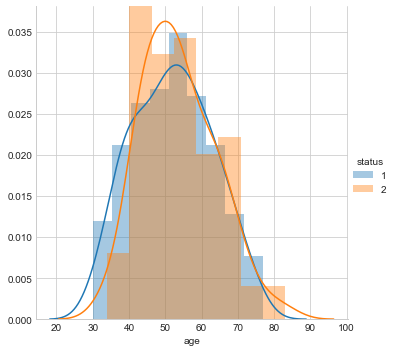

C:\Users\Sai_Anirudh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sai_Anirudh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


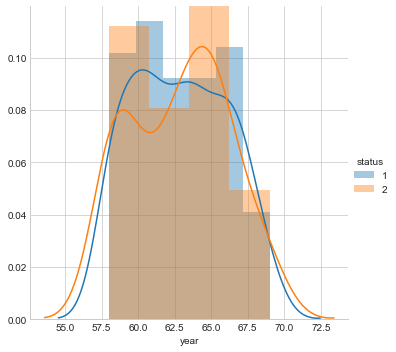

C:\Users\Sai_Anirudh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sai_Anirudh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


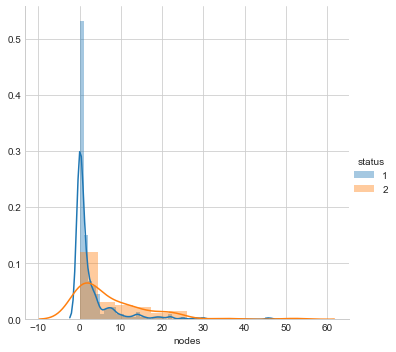

In [8]:
#next we shall use univariate analysis to understand which features are useful for classification
#histogram and pdf
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

# Observations:
1. We plotted three graphs showing the histograms of the age, year, and number of nodes respectively. Each histogram is classified into status 1 and status 2.
2. In all three graphs, there is a significant overlap between the curves for status 1 and status 2. It is therefore very difficult to build models based on if-else conditions to segregate the patients based on status.


# Plotting PDF and CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


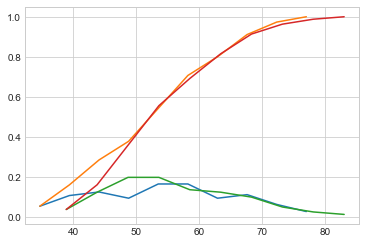

In [9]:
#next we will plot pdf and cdf of each parameter
#for patients who survived
#age
counts, bin_edges = np.histogram(haberman[haberman['status']==1]['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


#for patients who died

#age
counts, bin_edges = np.histogram(haberman[haberman['status']==2]['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();



# Observations:
1. PDF and CDF of parameter age are plotted for both survival status 1 and survival status 2.
2. From the above plot, we can see that there is significant overlap in the cdfs, and therefore there is no point where we can try to separate the patients based on age.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


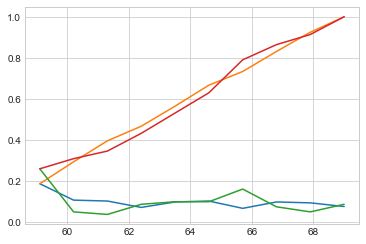

In [10]:
#for patients who survived
#year
counts, bin_edges = np.histogram(haberman[haberman['status']==1]['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#for patients who died
#year
counts, bin_edges = np.histogram(haberman[haberman['status']==2]['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();



# Observations:
1. PDF and CDF of parameter year are plotted for both survival status 1 and survival status 2.
2. From the above plot, we can see that there is significant overlap in the cdfs, and therefore there is no point where we can try to separate the patients based on year.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


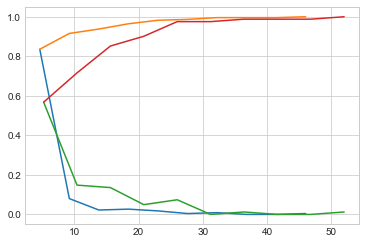

In [11]:
#for patients who survived
#nodes
counts, bin_edges = np.histogram(haberman[haberman['status']==1]['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#for patients who died
#nodes
counts, bin_edges = np.histogram(haberman[haberman['status']==2]['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

# Observations:
1. PDF and CDF of parameter nodes are plotted for both survival status 1 and survival status 2.
2. From the above plot, we can see that there is significant overlap in the cdfs, and therefore there is no point where we can try to separate the patients based on number of nodes.

# Boxplot

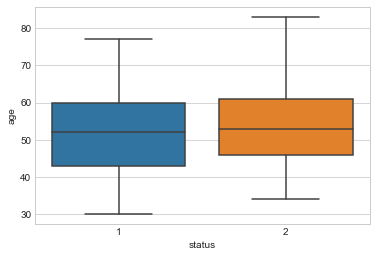

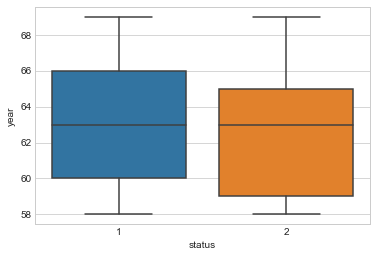

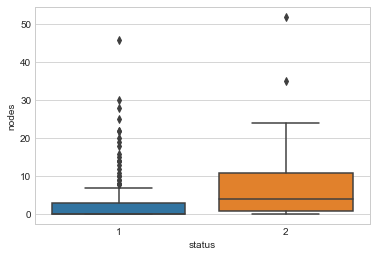

In [12]:
#next we will try boxplots
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

sns.boxplot(x='status',y='year', data=haberman)
plt.show()

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

# Observations:
1. We plot three different plots above, which are boxplots with survival status as x-axis, and with y-axis as age, year and nodes respectively.
2. Even though we can visualize the median, quartiles and outliers, there is a considerable overlap between status 1 patients and status 2 patients with respect to the other three parameters(age, year and nodes). This makes it impossible to set any threshold value to separate status 1 and status 2 patients by age, year or number of nodes. 

# Violin Plots

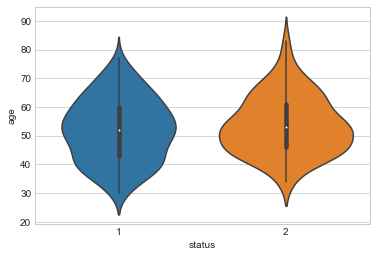

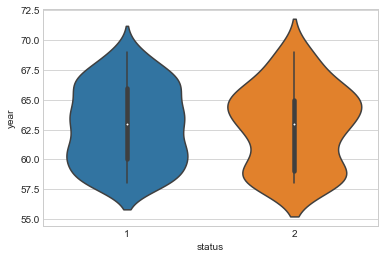

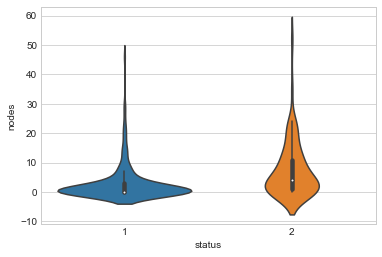

In [13]:
#we also do violin plots to understand the data
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.show()

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

# Observations:
1. We plot three different plots above, which are violin plots with survival status as x-axis, and with y-axis as age, year and nodes respectively.
2. Even though we can visualize the median, quartiles, outliers and also frequency distribution of y-axis parameters, there is a considerable overlap between status 1 patients and status 2 patients with respect to the frequency distribution of the other three parameters(age, year and nodes). This makes it impossible to set any threshold value to separate status 1 and status 2 patients by age, year or number of nodes. 

# Conclusion:
1. After performing Exploratory Data Analysis on the Haberman dataset, both univariate and bivariate analysis, we can conclude that it is impossible to linearly separate the status 1 and status 2 patients. 